This dataset is a huggingface.co database named poem_sentiment. The main columns are id, verse_text and label. Their datatypes are integer, string and class label respectively. The id contains the unique id for each entry on the dataset, the verse-text contains the actual line of the poem and the label contains the class of sentiment that the verse_text falls in. There are 4 levels for the sentiment. These are 0, 1, 2 and 3. 0 refers to lines that have negative impact on sentiment, 1 refers to lines that have positive impact, 2 refers to lines that have no impact, and 3 refers to lines which have mixed impact.

In [53]:
!pip install WordCloud
from wordcloud import WordCloud

Install the WordCloud directory

In [54]:
!pip install datasets

Install the dataset directory to get the poem_sentiment dataset from huggingface.co

In [55]:
from datasets import load_dataset
df = load_dataset("poem_sentiment")
sample_text = df["train"][0]
print("Sample Text:\n", sample_text)

Sample Text:
 {'id': 0, 'verse_text': 'with pale blue berries. in these peaceful shades--', 'label': 1}


Load the poem_sentiment dataset and get sample text from the train split.

In [56]:
train_data = df['train']
print(train_data.column_names)
print(train_data.features)

['id', 'verse_text', 'label']
{'id': Value(dtype='int32', id=None), 'verse_text': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'positive', 'no_impact', 'mixed'], id=None)}


Look at the type of data and columns in the dataset, along with its features.

#Preprocessing

##Rationale

The text preprocessing steps are designed to standardize and clean the data for sentiment analysis. Converting text to lowercase ensures consistency, removing unwanted characters reduces noise, and eliminating redundant words like stop words improves efficiency. Stripping extra whitespaces ensures a standardized format for accurate analysis. These steps collectively enhance the quality of sentiment insights by focusing on meaningful words and patterns in the dataset.

In [57]:
import pandas as pd
df = df["train"].to_pandas()
df.head()

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3


Convert the dataset into a dataframe

In [58]:
df_1 = df[df["label"]== 0]
df_2 = df[df["label"]== 1]
df_3 = df[df["label"]== 2]
df_4 = df[df["label"]== 3]

Give all the categories seperate headers and split them into different dataframes

In [59]:
text1 = df_1['verse_text']
list1 = [word for sentence in text1 for word in sentence.split()]
text2 = df_2['verse_text']
list2 = [word for sentence in text2 for word in sentence.split()]
text3 = df_3['verse_text']
list3 = [word for sentence in text3 for word in sentence.split()]
text4 = df_4['verse_text']
list4 = [word for sentence in text4 for word in sentence.split()]

Split the poem sentences into strings in order to remove stop words

In [60]:
stop_words = [
    "the", "and", "in", "of", "a", "to", "is", "it", "that", "with", "as",
    "for", "on", "by", "an", "be", "this", "or", "but", "at", "not", "which",
    "from", "are", "were", "am", "have", "has", "had", "if", "when", "where",
    "who", "whom", "whose", "will", "would", "should", "could", "can", "may",
    "might", "do", "does", "did", "doing", "done", "was", "were", "been",
    "being", "I", "you", "he", "she", "it", "we", "they", "me", "him", "her",
    "us", "them", "my", "your", "his", "its", "our", "their", "mine", "yours",
    "hers", "ours", "theirs"
]
processed_list_1 = [word for word in list1 if word not in stop_words]
print(processed_list_1)
processed_list_2 = [word for word in list2 if word not in stop_words]
print(processed_list_2)
processed_list_3 = [word for word in list3 if word not in stop_words]
print(processed_list_3)
processed_list_4 = [word for word in list4 if word not in stop_words]
print(processed_list_4)

['why,', 'lonesome', 'day,', 'so', 'on.', 'then', 'worthless', 'gaud', 'two,', 'sounded', "o'er", 'earth', 'sea', 'blast', 'war,', 'want', 'woe,', 'torture', 'us,', 'echo', 'returned', 'cold', 'gray', 'morn,', 'while', 'i,', '...', 'i', 'built', 'up', 'follies', 'like', 'wall', 'ah,', 'what', 'pang', 'aching', 'sharp', 'surprise', 'old', 'swallow-haunted', 'barns,--', 'bearing', 'home', 'burned', 'nest,', 'crown', 'sorrow', 'heads,', 'loss', 'i', 'lay', 'watched', 'lonely', 'gloom;', 'sceptre,--monstrous,', 'winged,', 'intolerable.', 'while', 'rude', 'winds', 'blow', 'off', 'each', 'shadowy', 'crown.', 'o,', 'nevermore', 'prison', 'tight.', 'meditate', 'whole', "youth's", 'loss,', 'thee,', 'eyes', 'harsh', 'long', 'ago', 'foes', 'inclosing,', 'friend', 'pursued,', 'bow', 'dread', 'inquisitor', 'worship', 'lords', 'dust;', 'miles', 'off,', 'three', 'dangerous', 'miles,', 'home;', 'else,', 'suffer’d,', 'set', 'heart', 'fire,', 'what', 'gods,', 'what', 'madness,', 'hither', 'steer’d', 'co

Remove the stop words from every single category.

In [61]:
phrase_list_1= [
    ' '.join(processed_list_1[i:i+2])
    for i in range(len(processed_list_1)-1)
]
print(phrase_list_1[:10])

['why, lonesome', 'lonesome day,', 'day, so', 'so on.', 'on. then', 'then worthless', 'worthless gaud', 'gaud two,', 'two, sounded', "sounded o'er"]


In [62]:
phrase_list_2= [
    ' '.join(processed_list_2[i:i+2])
    for i in range(len(processed_list_2)-1)
]
print(phrase_list_2[:10])

['pale blue', 'blue berries.', 'berries. these', 'these peaceful', 'peaceful shades--', 'shades-- charmingly', 'charmingly bourbon', 'bourbon air.', 'air. brightly', 'brightly expressive']


In [63]:
phrase_list_3= [
    ' '.join(processed_list_3[i:i+2])
    for i in range(len(processed_list_3)-1)
]
print(phrase_list_3[:10])

['flows so', 'so long', 'long falls', 'falls rain,', 'rain, very', 'very venus', 'venus pipe.', 'pipe. man,', 'man, who,', 'who, called']


In [64]:
phrase_list_4= [
    ' '.join(processed_list_4[i:i+2])
    for i in range(len(processed_list_4)-1)
]
print(phrase_list_4[:10])

['i peruse', 'peruse conquered', 'conquered fame', 'fame heroes,', 'heroes, victories', 'victories mighty', 'mighty generals,', 'generals, i', 'i envy', 'envy generals,']


In [65]:
processed_list_1= phrase_list_1 + processed_list_1
processed_list_2= phrase_list_2 + processed_list_2
processed_list_3= phrase_list_3 + processed_list_3
processed_list_4= phrase_list_4 + processed_list_4

Make two word phrases and connect said phrases to the already preprocessed list in order to start the frequency analysis.

#Text Analysis

##Frequency Analysis


In [66]:
word_freq_1 = {}
for word in processed_list_1:
    word = word.lower()
    if word in word_freq_1:
        word_freq_1[word] += 1
    else:
        word_freq_1[word] = 1

sorted_word_freq_1 = dict(sorted(word_freq_1.items(), key=lambda item: item[1], reverse=True))
top_20_words_1 = list(sorted_word_freq_1.items())[:20]

for word, freq in top_20_words_1:
    print(f'{word}: {freq}')

i: 7
thy: 6
while: 4
like: 4
eyes: 4
all: 4
o'er: 3
what: 3
set: 3
comes: 3
till: 3
world: 3
make: 3
how: 3
though: 3
heavy: 3
no: 3
danger i: 2
then: 2
sea: 2


Frequency analysis for category 0 (negative impact)

In [67]:
word_freq_2 = {}
for word in processed_list_2:
    word = word.lower()
    if word in word_freq_2:
        word_freq_2[word] += 1
    else:
        word_freq_2[word] = 1

sorted_word_freq_2 = dict(sorted(word_freq_2.items(), key=lambda item: item[1], reverse=True))
top_20_words_2 = list(sorted_word_freq_2.items())[:20]

for word, freq in top_20_words_2:
    print(f'{word}: {freq}')

thy: 10
so: 6
all: 5
sweet: 5
than: 4
thought: 3
thee,: 3
calm: 3
love: 3
those: 3
full: 3
i: 3
swifter: 3
far: 3
brave: 3
swifter far: 2
far than: 2
drop: 2
lips: 2
honour: 2


Frequency analysis for category 1 (positive impact)

In [68]:
word_freq_3 = {}
for word in processed_list_3:
    word = word.lower()
    if word in word_freq_3:
        word_freq_3[word] += 1
    else:
        word_freq_3[word] = 1

sorted_word_freq_3 = dict(sorted(word_freq_3.items(), key=lambda item: item[1], reverse=True))
top_20_words_3 = list(sorted_word_freq_3.items())[:20]

for word, freq in top_20_words_3:
    print(f'{word}: {freq}')

i: 52
all: 20
like: 14
so: 13
what: 13
then: 11
how: 10
upon: 10
yet: 10
shall: 10
see: 10
thy: 10
de: 9
some: 8
three: 8
up: 6
little: 6
thou: 6
down: 6
these: 6


Frequency analysis for category 2 (no impact)

In [69]:
word_freq_4 = {}
for word in processed_list_4:
    word = word.lower()
    if word in word_freq_4:
        word_freq_4[word] += 1
    else:
        word_freq_4[word] = 1

sorted_word_freq_4 = dict(sorted(word_freq_4.items(), key=lambda item: item[1], reverse=True))
top_20_words_4 = list(sorted_word_freq_4.items())[:20]

for word, freq in top_20_words_4:
    print(f'{word}: {freq}')

i: 8
through: 5
thou: 5
how: 4
love: 3
.: 3
. .: 2
generals,: 2
like: 2
sigurd,: 2
right: 2
death: 2
death,: 2
bright: 2
heaven: 2
heart: 2
all: 2
lips: 2
nor: 2
rich: 2


Frequency analysis for category 3 (mixed impact)

## Frequency Analysis Insights

The frequency analysis of all the different sentiments provide a very helpful insight inside the nature of the poems. The poems which caused negative sentiment had words usually associated with negative emotions while poems with positive sentiment impacts had words usually associated with positive emotions. Likewise, poems which had no impact contains neutral words while poems which had mixed impact contained text with both positive and negative vocabulary. Examples in negative sentiment containing poems are words like heavy, no, and torture. Likewise, positive sentiment containing poems contain words like sweet, calm, love, brave, honour, and perfect. No sentiment change contains words like shall, three, little, and down, while mixed emotion poems contain words like death, bright, heaven, love, rich, and sigurd.

## Wordclouds

Making word plots for every single category

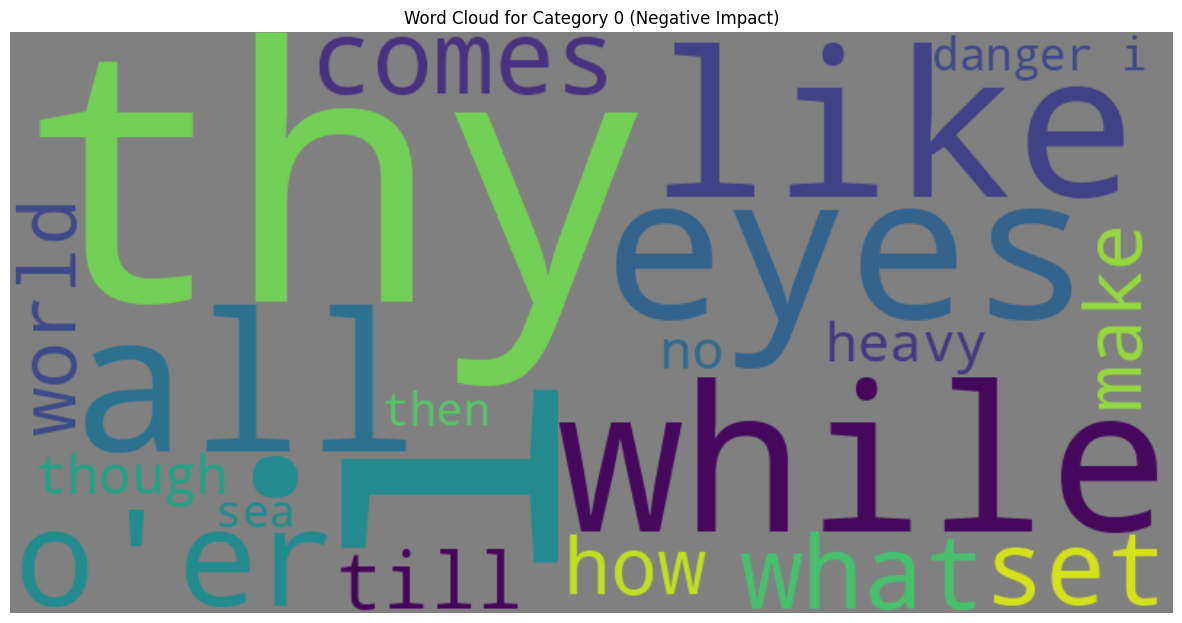

In [70]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color ='grey')
wordcloud.generate_from_frequencies(dict(top_20_words_1))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Category 0 (Negative Impact)')
plt.show()

The word cloud for Category 0 (Negative impact) mainly shows single words and not phrases which shows that the most common use of emotions is conveyed through single words and not phrases.

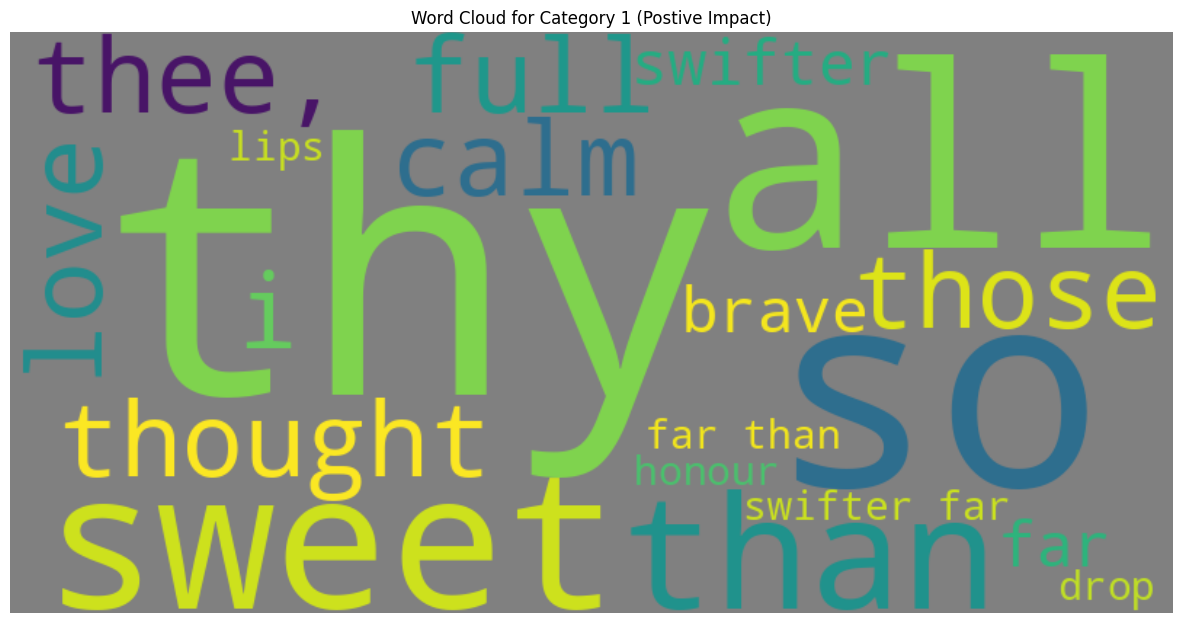

In [71]:
wordcloud = WordCloud(width=800, height=400, background_color ='grey')
wordcloud.generate_from_frequencies(dict(top_20_words_2))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Category 1 (Postive Impact)')
plt.show()

The word cloud for Category 1(Postive impact) has a more even distribution of words and phrases which shows that positive emotion is also conveyed through words and phrases, unlike negative impact.

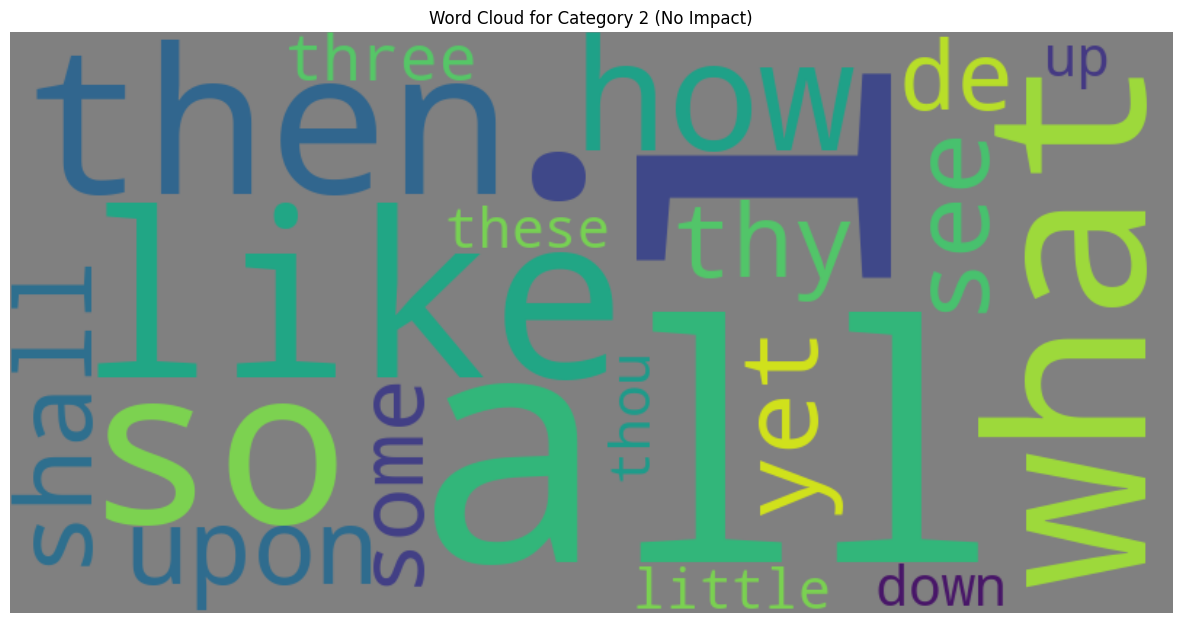

In [72]:
wordcloud = WordCloud(width=800, height=400, background_color ='grey')
wordcloud.generate_from_frequencies(dict(top_20_words_3))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Category 2 (No Impact)')
plt.show()

The word cloud for Category 2(No impact) has less phrases when compared to Category 1 but more than Category 0. This does not really matter as no emotion is conveyed in this category.

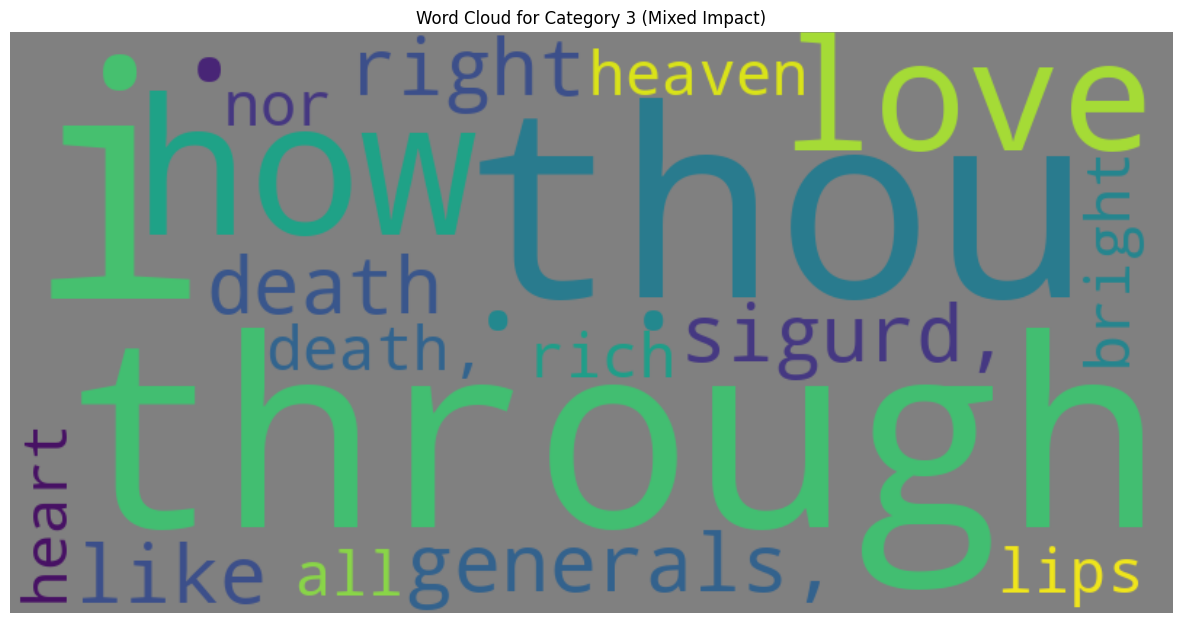

In [73]:
wordcloud = WordCloud(width=800, height=400, background_color ='grey')
wordcloud.generate_from_frequencies(dict(top_20_words_4))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Category 3 (Mixed Impact)')
plt.show()

The word cloud for Category 3 (Mixed impact) is like the word cloud for Category 0, which means it contains no phrases. This signifies that mixed sentiment is usually characterized by one word conveying each sentiment.

#Discussion and Insights

##Word Cloud Comparison

There were some commanlites and some differences in the word clouds for the differnt categories. The main commonalities between the word clouds is that their top words used are single words and not phrases and the majority of elements feature single words. The main difference between these word clouds are the number of phrases that appear in them, with Category 1 having the highest number of phrases, Category 2 coming in after that, and Category 3 and Category 0 tied at the lowest with no phrases in the word clouds.

##Insights


Insights from the analysis reveal patterns in sentiment-specific word usage and notable differences in bigram frequencies among positive, negative, and mixed sentiment categories. Common words like "love" and "beauty" emerge in positive sentiments, while negative sentiments often feature words like "pain" and "darkness." Mixed sentiments exhibit a blend of both positive and negative terms.

One other thing that could be used to make the coding part easier and the results more accurate is 'nltk' library. This contains functions which would let us make the process more efficient and reduce the amount of coding to be done. To further improve results, one could explore more advanced techniques such as lemmatization to reduce words to their base forms, potentially capturing nuanced sentiment variations. Additionally, exploring n-grams beyond bigrams and considering the context of phrases could enhance the understanding of sentiment expression. Fine-tuning the list of redundant words and stop words based on the specific characteristics of poetry could also refine the analysis. Lastly, incorporating sentiment lexicons or training a sentiment classifier on poetry data could provide more nuanced sentiment scores for each verse.